**ASSIGNMENT 3** 

**QUESTION 2** 

Learn the following models on XOR dataset (refer to Tensorflow Playground and generate the dataset on your own containing 200 training instances and 200 test instances) such that all these models achieve similar results (good). The definition of good is left subjective – but you would expect the classifier to capture the shape of the XOR function. 

a) MLP

b )MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)

c) MLP w/ L2 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)

d) learn logistic regression models on the same data with additional features (such as x1*x2, x1^2, etc.)

Show the decision surface and comment on the plots obtained for different models. 



Epoch [100/1000], Loss: 0.2318
Epoch [200/1000], Loss: 0.1057
Epoch [300/1000], Loss: 0.0733
Epoch [400/1000], Loss: 0.0569
Epoch [500/1000], Loss: 0.0465
Epoch [600/1000], Loss: 0.0393
Epoch [700/1000], Loss: 0.0338
Epoch [800/1000], Loss: 0.0295
Epoch [900/1000], Loss: 0.0260
Epoch [1000/1000], Loss: 0.0230
Accuracy on test data: 97.00%


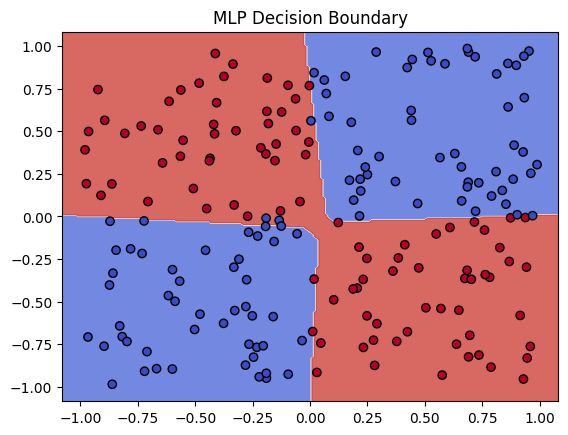

In [138]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate XOR dataset
def generate_xor_dataset(n_samples):
    X = np.random.rand(n_samples, 2) * 2 - 1  # Generate random points in range [-1, 1]
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)  # XOR function
    return X, y

n_train = 200
n_test = 200

X_train_full, y_train_full = generate_xor_dataset(n_train)
X_test, y_test = generate_xor_dataset(n_test)

# Split into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Convert to PyTorch tensors with appropriate types
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Use long for CrossEntropyLoss
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define MLP Model with 1 hidden layer
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 10)  # 2 input features, 10 hidden units
        self.fc2 = nn.Linear(10, 2)  # 2 output units (for XOR classification)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU on the hidden layer
        x = self.fc2(x)  # Output layer (logits for CrossEntropyLoss)
        return x

# Initialize model, loss function, and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss expects raw logits
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    model.eval()
    y_pred = model(X_test_tensor)
    predicted_labels = torch.argmax(y_pred, dim=1)
    accuracy = (predicted_labels == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy on test data: {accuracy * 100:.2f}%')

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.Tensor(grid)
    
    with torch.no_grad():
        pred = model(grid_tensor)
        pred = torch.argmax(pred, dim=1).numpy()

    pred = pred.reshape(xx.shape)
    plt.contourf(xx, yy, pred, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title('MLP Decision Boundary')
    plt.show()

# Visualize decision boundary for test data
plot_decision_boundary(model, X_test, y_test)


Epoch [500/1000], Loss: 0.1616, Val Loss: 0.2270
Epoch [1000/1000], Loss: 0.0649, Val Loss: 0.1139
Epoch [500/1000], Loss: 0.1075, Val Loss: 0.1130
Epoch [1000/1000], Loss: 0.0889, Val Loss: 0.1150
Epoch [500/1000], Loss: 0.4825, Val Loss: 0.1157
Epoch [1000/1000], Loss: 0.4012, Val Loss: 0.1342
Best L1 Penalty Coefficient: 0.001
Test Accuracy: 94.00%


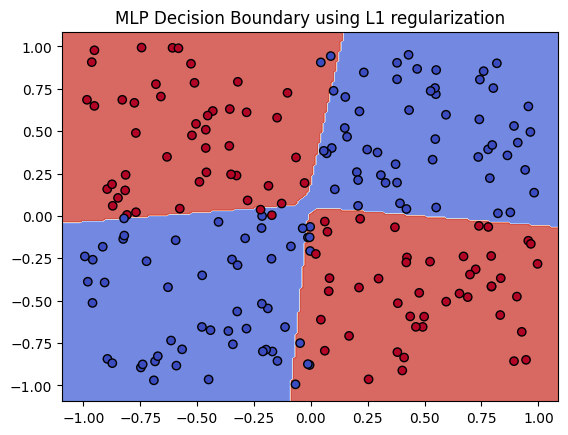

In [135]:
#  Define the MLP model with L1 regularization
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

input_size = 2
hidden_size = 10  # Increased hidden size for better learning capacity
output_size = 1
model = MLP(input_size, hidden_size, output_size)

#  Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
penalty_coefficients = [0.0001, 0.001, 0.01]  # Lower L1 penalty coefficients

# Function to calculate L1 penalty
def l1_penalty(model):
    l1_loss = 0
    for param in model.parameters():
        l1_loss += torch.sum(torch.abs(param))
    return l1_loss

#  Train the model with L1 regularization and validation
best_model = None
best_val_loss = float('inf')
best_penalty = None

for penalty in penalty_coefficients:
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Reduced learning rate
    
    num_epochs = 1000  # Increased epochs for more training
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        # Reshape y_train_tensor to match the output shape
        # Ensure y_train_tensor is a float tensor and has the correct shape
        loss = criterion(outputs, y_train_tensor.view(-1, 1).float()) + penalty * l1_penalty(model)


        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Validation
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            # Reshape y_val_tensor to match the output shape and ensure it's a float tensor
            val_loss = criterion(val_outputs, y_val_tensor.view(-1, 1).float())

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = model.state_dict()  # Save the best model
                best_penalty = penalty

        if (epoch+1) % 500 == 0:  # Print every 500 epochs
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

print(f'Best L1 Penalty Coefficient: {best_penalty}')

#  Load the best model and test it
model.load_state_dict(best_model)

# Test on the test set
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), test_preds.numpy())
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.Tensor(grid)

    # Ensure the grid tensor is on the same device as the model
    grid_tensor = grid_tensor.to(next(model.parameters()).device)

    with torch.no_grad():
        pred = model(grid_tensor)
        pred = (pred > 0.5).float().cpu().numpy()  # Convert probabilities to binary, move to CPU if on GPU

    pred = pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, pred, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title('MLP Decision Boundary using L1 regularization')
    plt.show()


plot_decision_boundary(model, X_test, y_test)


Epoch [500/1000], Loss: 0.2233, Val Loss: 0.3165
Epoch [1000/1000], Loss: 0.0721, Val Loss: 0.1268
Epoch [500/1000], Loss: 0.1243, Val Loss: 0.1075
Epoch [1000/1000], Loss: 0.1144, Val Loss: 0.0994
Epoch [500/1000], Loss: 0.4961, Val Loss: 0.1945
Epoch [1000/1000], Loss: 0.4627, Val Loss: 0.2224
Best L2 Penalty Coefficient: 0.001
Test Accuracy: 95.00%


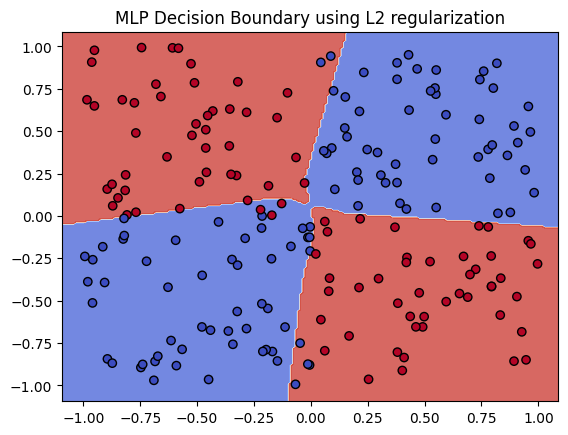

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define the MLP model with L2 regularization
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

input_size = 2
hidden_size = 10
output_size = 1
model = MLP(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
penalty_coefficients = [0.0001, 0.001, 0.01]

# Function to calculate L2 penalty
def l2_penalty(model):
    l2_loss = 0
    for param in model.parameters():
        l2_loss += torch.sum(param ** 2)
    return l2_loss

# Ensure tensors are float type and reshaped correctly
y_train_tensor = y_train_tensor.view(-1, 1).float()
y_val_tensor = y_val_tensor.view(-1, 1).float()
y_test_tensor = y_test_tensor.view(-1, 1).float()

# Train the model with L2 regularization and validation
best_model = None
best_val_loss = float('inf')
best_penalty = None

for penalty in penalty_coefficients:
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    num_epochs = 1000
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor) + penalty * l2_penalty(model)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Validation
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = model.state_dict()
                best_penalty = penalty

        if (epoch+1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

print(f'Best L2 Penalty Coefficient: {best_penalty}')

# Load the best model and test it
model.load_state_dict(best_model)

# Test on the test set
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), test_preds.numpy())
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.Tensor(grid)

    model.eval()  # Set model to eval mode for inference
    with torch.no_grad():
        pred = model(grid_tensor)
        pred = (pred > 0.5).float().numpy()
    
    pred = pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, pred, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title('MLP Decision Boundary using L2 regularization')
    plt.show()

# Plot decision boundary
plot_decision_boundary(model, X_test, y_test)


Epoch [100/1000], Loss: 0.5564, Val Loss: 0.5601
Epoch [200/1000], Loss: 0.4838, Val Loss: 0.4887
Epoch [300/1000], Loss: 0.4315, Val Loss: 0.4375
Epoch [400/1000], Loss: 0.3921, Val Loss: 0.3995
Epoch [500/1000], Loss: 0.3614, Val Loss: 0.3701
Epoch [600/1000], Loss: 0.3366, Val Loss: 0.3467
Epoch [700/1000], Loss: 0.3161, Val Loss: 0.3274
Epoch [800/1000], Loss: 0.2988, Val Loss: 0.3112
Epoch [900/1000], Loss: 0.2839, Val Loss: 0.2972
Epoch [1000/1000], Loss: 0.2708, Val Loss: 0.2851
Test Accuracy: 91.00%


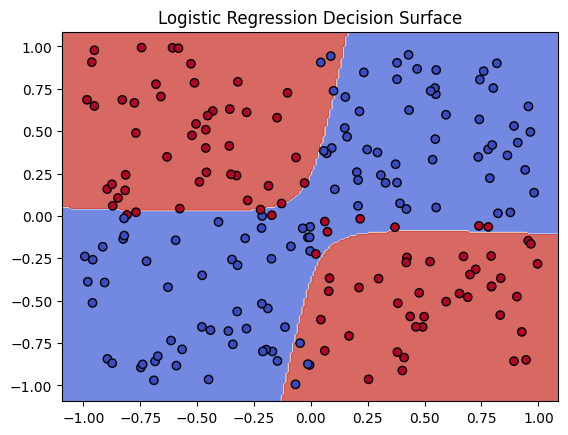

In [137]:
# Create additional features for training
def create_additional_features(X):
    x1, x2 = X[:, 0], X[:, 1]
    additional_features = np.column_stack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))  # Add new features
    return additional_features

# Transform training, validation, and test sets
X_train_add = create_additional_features(X_train)
X_val_add = create_additional_features(X_val)
X_test_add = create_additional_features(X_test)

#  Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_add, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_add, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_add, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

#  Define Logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

input_size = X_train_add.shape[1]  # Number of input features
model = LogisticRegression(input_size)

#  Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

#  Train the model
num_epochs = 1000
best_model = None
best_val_loss = float('inf')

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict()  # Save the best model

    if (epoch+1) % 100 == 0:  # Print every 100 epochs
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

#  Load the best model and test it
model.load_state_dict(best_model)

# Test on the test set
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), test_preds.numpy())
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

#  Plot decision boundary
def plot_decision_surface(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_add = create_additional_features(grid)  # Create additional features for the grid
    grid_tensor = torch.tensor(grid_add, dtype=torch.float32)
    
    with torch.no_grad():
        pred = model(grid_tensor)
        pred = (pred > 0.5).float().numpy()  # Convert probabilities to binary predictions

    pred = pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, pred, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title('Logistic Regression Decision Surface')
    plt.show()

plot_decision_surface(model, X_test_add, y_test)


MLP (Multi-Layer Perceptron) Decision Boundary: The decision boundary for the MLP model separates the two classes in the XOR dataset reasonably well. However, since an MLP is a flexible model, it can sometimes overfit the data, leading to a decision boundary that might be overly complex.

MLP with L1 Regularization Decision Boundary: L1 regularization encourages sparsity in the model's weights by adding the absolute values of the weights to the loss function. The decision boundary for this model tends to have simpler shapes compared to the standard MLP, as L1 regularization penalizes large weights and can effectively reduce overfitting.

MLP with L2 Regularization Decision Boundary: L2 regularization penalizes the squared magnitudes of the model's weights, effectively reducing the overall magnitude of the weights. The decision boundary for this model tends to be smoother compared to the standard MLP, as L2 regularization prevents extreme weights and helps in generalization.

Logistic Regression with Additional Features Decision Boundary: By adding polynomial features (such as x1*x2, x1^2, etc.), logistic regression can capture more complex decision boundaries. In the XOR dataset, the decision boundary appears to be linear due to the limited number of polynomial features added. However, with more complex datasets, adding additional features can lead to decision boundaries that capture intricate patterns.